<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/tutorial/Tutorial_10_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, Abilene Christian University, PHYS 453**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # for making palettes

# Common utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Tutorial 10: Decision Trees


Decision trees are efficient, effective, "white box" classifier that are prone to overfitting.  In fact, the best reason to use a simple decision tree is to produce human-understandable rules. Moreoever, these trees are also the basis for the current best-performing classifiers for tabular data.

Its time to grow some trees!

**REFERENCES**
* User Guide: https://scikit-learn.org/stable/modules/tree.html#tree
* API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


Before we begin, let me remind you of:

# Dr D's Golden Rule:
**ALWAYS TEST YOUR CODE IN CASES WHERE YOU KNOW THE RIGHT ANSWER!**

We will start with some simple 2D blob data.  (You are probably bored of flowers by now)

In [3]:
# The default colors in plot_tree are orange and blue, so I'll make some palettes to match
cmap_bold = ListedColormap(['tab:orange','tab:blue'])
cmap_light = ListedColormap(['bisque','lightsteelblue'])

Use the make_blobs function to quickly produce some blobs of 2 feature, 2 class data:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

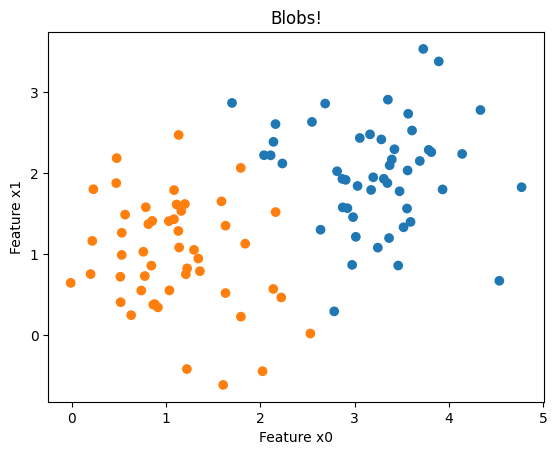

In [4]:
X_blob, y_blob = datasets.make_blobs(n_samples=100, centers=[[1,1],[3,2]], cluster_std=0.7, n_features=2, random_state=1)

plt.figure()
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=cmap_bold)
plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Blobs!")
plt.show()

# First Example: Train and Predict
As with all sklearn classifiers:
* declare a new classifier and set your parameters
* `fit` to the training data
* `predict` new samples to classify

As we discussed in class the decisison trees will **over-train by default**, so we'll look at how to fix that later.

While growing the tree the algorithm chooses the best feature to use for the next split.  In case of a tie it will choose randomly, so if you don't specify ```random_state``` you may get different results each time you call fit.

In [5]:
clf = DecisionTreeClassifier(random_state=1)  # chosen to prove a point later
clf.fit(X_blob, y_blob)

DecisionTreeClassifier(random_state=1)

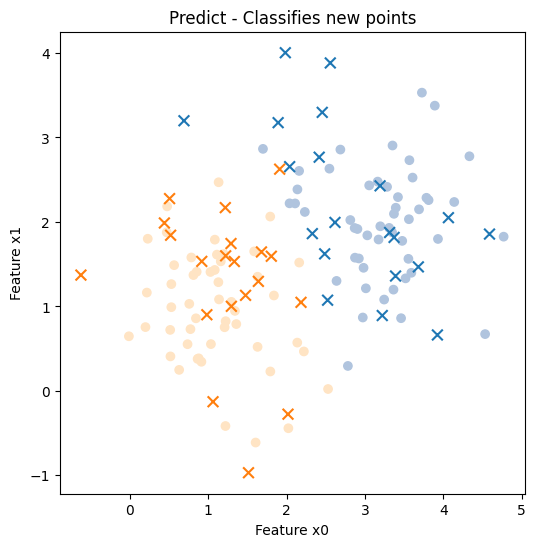

In [6]:
# Make some new points to predict: 20 rows, 2 columns, gaussian with mean=2 and stdev=1
X_pred = np.random.normal(loc=2, scale = 1, size=(40,2))
y_pred = clf.predict(X_pred)

# plot the new predictions
plt.figure(figsize=(6,6))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, marker='o', cmap=cmap_light )
plt.scatter(X_pred[:,0], X_pred[:,1], c=y_pred, marker='x',cmap=cmap_bold, s=60)

plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Predict - Classifies new points")
plt.show()

# Decision Boundary

The predictions (bold x's) seem reasonable compared to our training data (light circles).  But there are a few odd choices.  We need a way to see the **DECISION BOUNDARY**, the dividing line between orange and blue.  One direct way to get this is to predict an entire grid of points.  This is easy using:
https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator

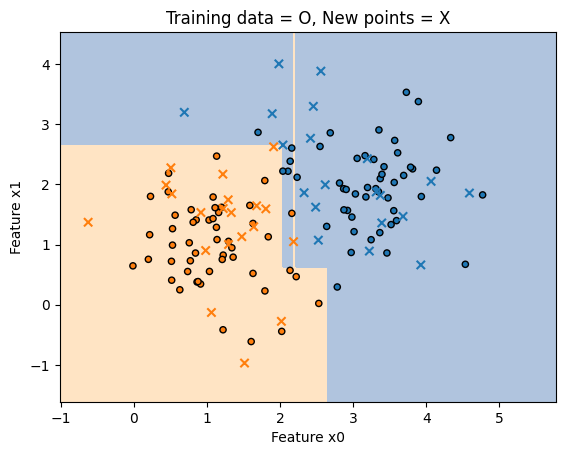

In [14]:
DecisionBoundaryDisplay.from_estimator(clf, X_blob,cmap=cmap_light, grid_resolution=200)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=cmap_bold,edgecolor='k', s=20)
plt.scatter(X_pred[:,0], X_pred[:,1], c=y_pred, marker='x',cmap=cmap_bold)
plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Training data = O, New points = X")
plt.show()

# Depth Examples
One common way to avoid overfitting is to restrict the size of the tree.  Limiting the tree size also makes it easier to dig into the tree's structure and understand it.  

The next examples do two things:
1.  Use the `plot_tree` function to visualize the tree
2.  Limit the `max_depth` to go from simple to more complex trees.

I'll define a new function to make these plots to avoid having to copy-and-paste the same code four times

In [20]:
def make_tree_plots(depth):
  """Makes a new tree of a fixed depth, then plots the tree structure and decision boundary"""
  plt.figure(figsize=(14,6))

  plt.subplot(1,2,1)
  clf = DecisionTreeClassifier(max_depth=depth,random_state=1) # setting random state to get the result I want
  clf.fit(X_blob, y_blob)
  plot_tree(clf, filled=True, class_names=['orange','blue'])

  ax = plt.subplot(1,2,2)
  DecisionBoundaryDisplay.from_estimator(clf, X_blob,cmap=cmap_light, grid_resolution=200, ax=ax)
  plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=cmap_bold,edgecolor='k', s=20)
  plt.xlabel("Feature x0")
  plt.ylabel("Feature x1")
  plt.title("Decision Boundary")

  plt.show()

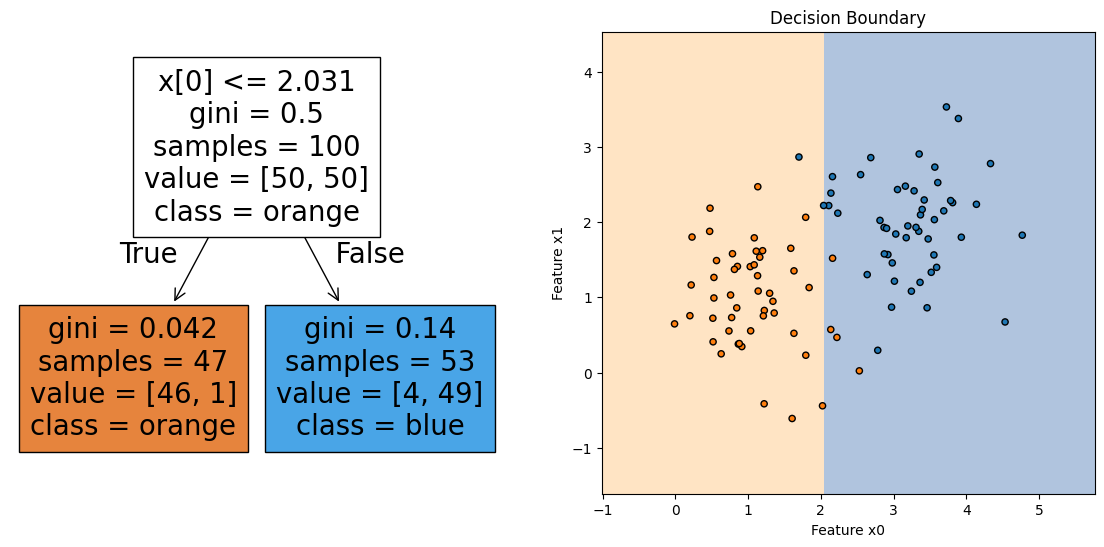

In [21]:
make_tree_plots(depth=1)

Take a moment and make sure you understand every detail of this diagram.  **The left branch is always yes!**

Check the missed points and make sure they match the tree.  Let's improve this by adding more layers

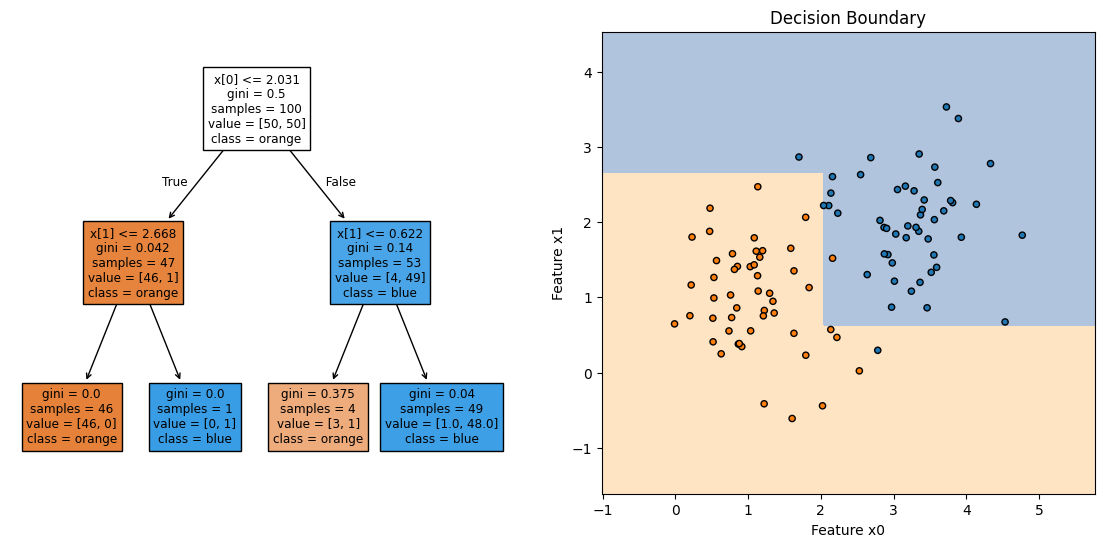

In [22]:
make_tree_plots(depth=2)

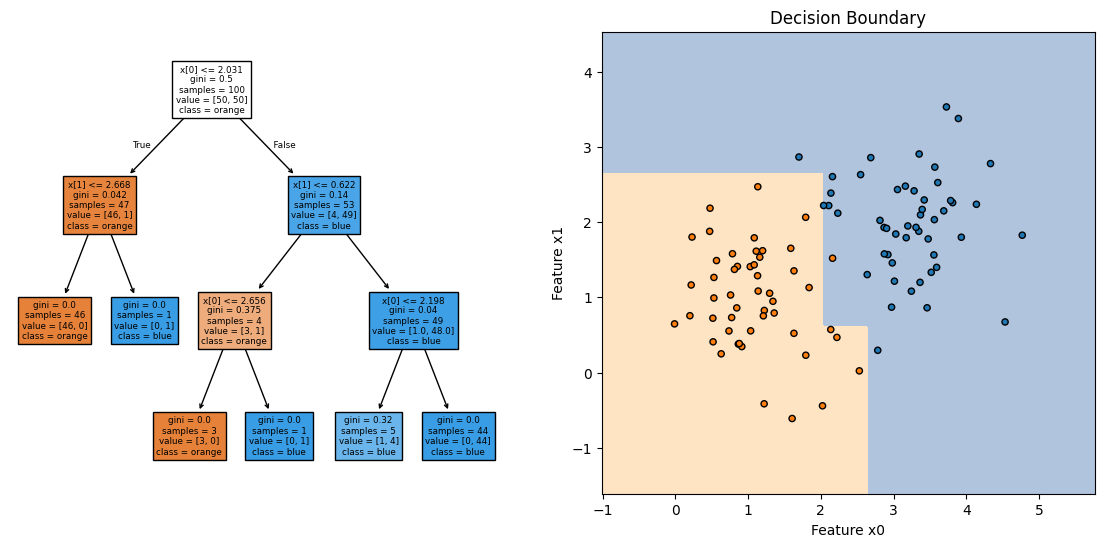

In [23]:
make_tree_plots(depth=3)

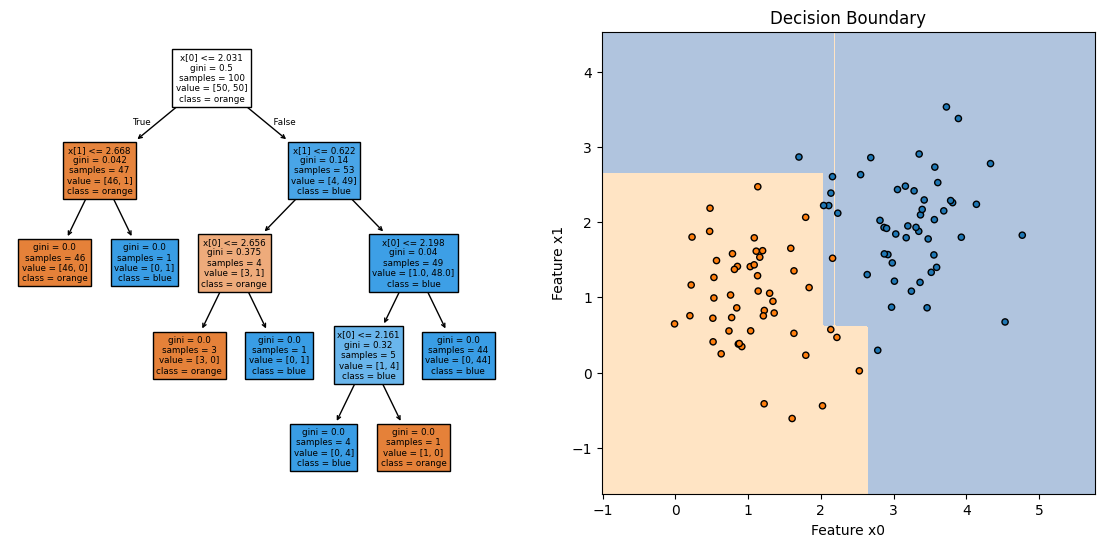

In [24]:
make_tree_plots(depth=4)

# Iris Trees
Admit it: you were missing the flowers, weren't you?

In [25]:
#Load only two features of Iris
data_bunch = datasets.load_iris()
data_bunch.keys()
X = data_bunch.data[:,:2] # Load just 2 features from the Iris Dataset
y = data_bunch.target

target_names = data_bunch.target_names
feature_names = data_bunch.feature_names
print('Targets:\t',target_names)
print('Feature:\t',feature_names)
print('Data shape:\t',X.shape)

Targets:	 ['setosa' 'versicolor' 'virginica']
Feature:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data shape:	 (150, 2)


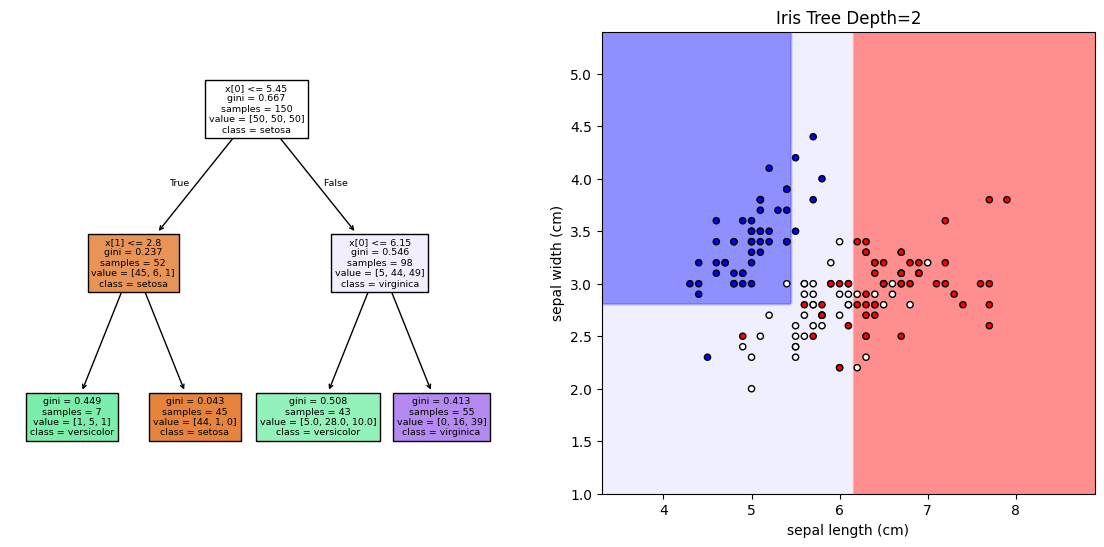

In [29]:
plt.figure(figsize=(14,6))
depth=2  # try different values!
plt.subplot(1,2,1)
clf = DecisionTreeClassifier(max_depth=depth,random_state=1) # setting random state to get the result I want
clf.fit(X, y)
plot_tree(clf, filled=True, class_names=target_names)

ax = plt.subplot(1,2,2)
DecisionBoundaryDisplay.from_estimator(clf, X,cmap='bwr', grid_resolution=200, ax=ax, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr',edgecolor='k', s=20)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f"Iris Tree Depth={depth}")

plt.show()

# Recipe Setup
Following Tutorial 8, here's a recipe for KNN to use.  I'll try to put all of the useful things together in one place

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) # stratify ensures an equal ratio of each target

In [32]:

def make_grid_plot_labels(grid_clf):
  # Turns a parameter dictionary entry into a single string and returns the whole list
  res = grid_clf.cv_results_
  NUM_KEYS = len(res['params'][0].values())
  labels = []
  for item in res['params']:
    labels.append("_".join( [str(val) for val in item.values()]))
  return labels

def make_grid_plot(grid_clf):
  # Displays the scores for every set of parameters
  res = grid_clf.cv_results_
  plt.figure(figsize=(8,4))
  plt.axvline(grid_clf.best_index_, color='black', lw=2) # draw black line behind best params

  NUM_KEYS = len(res['params'])
  x = np.arange(NUM_KEYS)
  plt.plot(res['mean_test_score'],'-o', label='Val')
  plt.fill_between(x,res['mean_test_score']+res['std_test_score'], res['mean_test_score']-res['std_test_score'], alpha=0.2)
  #plt.errorbar(x, res['mean_test_score'],yerr=res['std_test_score'],xerr=0,fmt='-o', capsize=2, label='Val')

  plt.plot(res['mean_train_score'],'-s', label='Train')
  plt.fill_between(x,res['mean_train_score']+res['std_train_score'], res['mean_train_score']-res['std_train_score'], alpha=0.2)
  #plt.errorbar(x, res['mean_train_score'],yerr=res['std_train_score'],xerr=0,fmt='-s', capsize=2,label='Train')
  plt.title('Grid CV Results')
  plt.ylabel('Mean Test Score')

  labels = make_grid_plot_labels(grid_clf)
  plt.xticks(ticks = x, labels=labels, rotation=90)
  plt.legend()
  plt.grid()
  plt.show()

# Recipe


**References**
* User Guide: https://scikit-learn.org/stable/modules/tree.html#tree
* API: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


**Parameters to know**
* ```max_depth```: Tree grows until the training score is 1 or max_depth is reached.  Default is *none* which will overfit.

**Training Notes**
* Increase max_depth until the train score is 1.00, this is the tree's true maximum depth and there is no point in going any higher
* In event of a tie when choosing features for the next split it will make a random choice.  Set `random_state` if you want consistent behavior
* The tree's performance is not affected by scaling the data.  If you want to make tree plots later, then you can just use **UN**scaled data for the tree.




Grid Parameters: {'clf__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])}


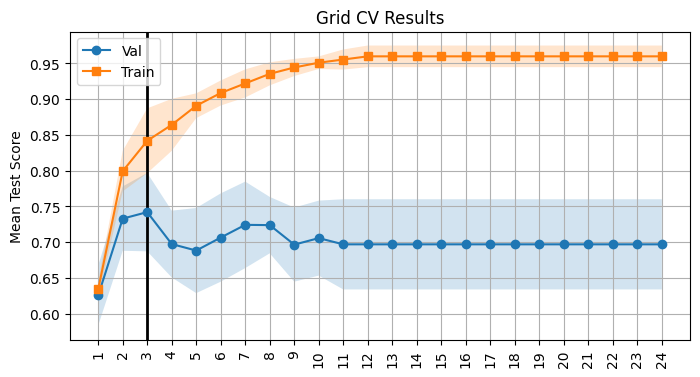

Best parameters: {'clf__max_depth': 3}
Best Validation Score:	0.742


In [35]:
# Define Pipeline
estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=0)) ]  # feel free to remove random_state
pipe = Pipeline(estimators)

# Grid Search Parameters
DEPTHS = np.arange(1,25)
params = {'clf__max_depth':DEPTHS}
print('Grid Parameters:',params)

grid_clf = GridSearchCV(pipe, param_grid=params, return_train_score=True)
grid_clf.fit(X_train, y_train)

make_grid_plot(grid_clf)

print('Best parameters:', grid_clf.best_params_)
print(f"Best Validation Score:\t{grid_clf.best_score_:0.3f}")

Notice the essential features:
* At the left (max_depth=1) the validation and training scores are similar but bad = UNDERFITTING
* For these trees as max_depth increases the training score monotonically increases to 1.0
* The validation score will increase to a peak, then decrease as the model begins to OVERFIT at large max_depth